# Titanic Competition
You should build an end-to-end machine learning pipeline to predict survivors of the Titanic disaster and participate in the corresponding Kaggle competition. In particular, you should do the following:
- Read the Titanic competition page on [Kaggle](https://www.kaggle.com/competitions/titanic/overview).
- Load the `titanic` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Build an end-to-end machine learning pipeline, including all necessary steps, to have a running solution with some performance.
- Collaborate with your groupmates to finalize your pipeline by
    - reading the discussion forum to learn from other community members;
    - discussing the bottlenecks of your current solution;
    - running experiments on your pipeline;
    - improving the performance of your pipeline.
- Test the best pipeline on the test set and report various [evaluation metrics](https://scikit-learn.org/0.15/modules/model_evaluation.html).  
- Present your pipeline.
- Submit your predictions to Kaggle.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("/Users/tactlabs/Documents/uni/sem-2/intro-to-ai-and-machine-learning/teaching/datasets/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train, df_test = train_test_split(df) #75/25 split

print("df size:",df.shape)
print("df_train size:",df_train.shape)
print("df_test size:",df_test.shape)

df size: (891, 12)
df_train size: (668, 12)
df_test size: (223, 12)


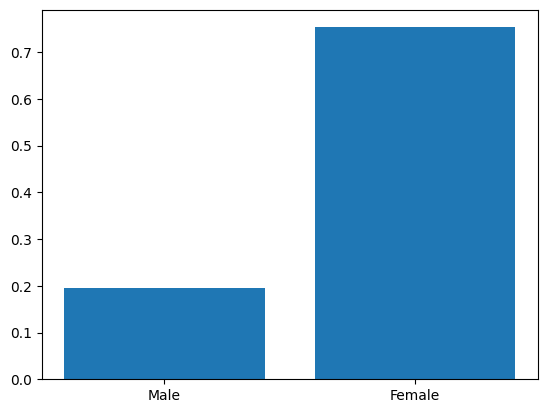

In [4]:
women = df_train.loc[df_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
men = df_train.loc[df_train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

plt.bar(["Male","Female"],[rate_men, rate_women])
plt.show()

In [5]:
# x_train = df_train.drop("Survived", axis=1)
x_train = df_train[["Pclass", "Sex", "SibSp", "Parch"]]
y_train = df_train["Survived"]

# x_test = df_test.drop("Survived", axis=1)
x_test = df_test[["Pclass", "Sex", "SibSp", "Parch"]]
y_test = df_test["Survived"]

print("x_train size", x_train.shape)
print("y_train size", y_train.shape)
print("x_test size", x_test.shape)
print("y_test size", y_test.shape)

x_train size (668, 4)
y_train size (668,)
x_test size (223, 4)
y_test size (223,)


In [6]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(x_train)
x_train = enc.transform(x_train)
x_test = enc.transform(x_test)

In [7]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [8]:
y_predict = model.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.8026905829596412